In [1]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

In [2]:
y = load_airline()
y

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [3]:
y.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Series name: Number of airline passengers
Non-Null Count  Dtype  
--------------  -----  
144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

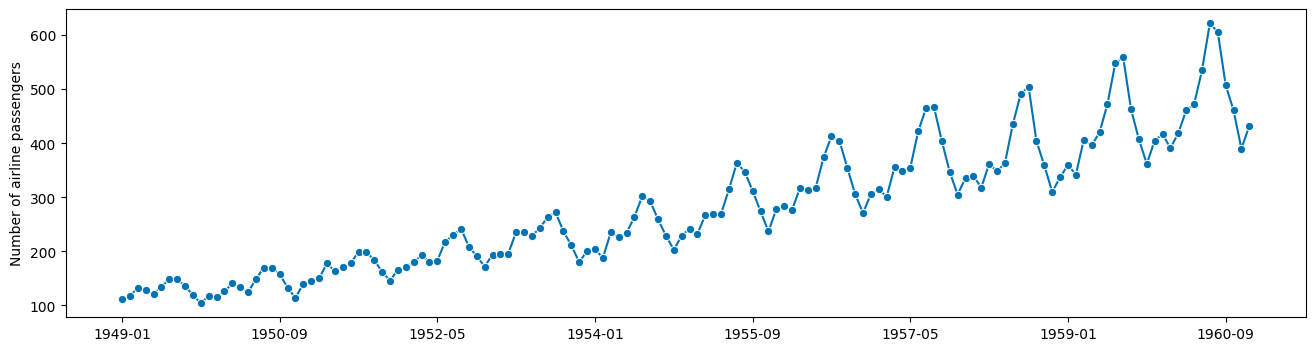

In [4]:

plot_series(y)

## Specify the forecast horizon

In [7]:
import numpy as np
import pandas as pd
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1960-01", periods=12, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

In [ ]:
# Using numpy
#h = np.arange(1, 37)
#fh
#import numpy as np
#fh = np.array([2, 5])  # 2nd and 5th step ahead

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

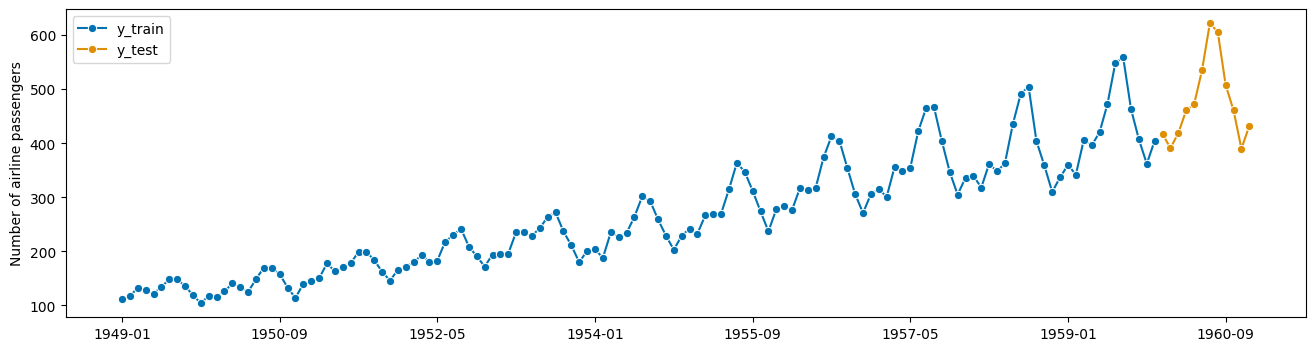

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, fh=fh)
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [10]:
from sktime.forecasting.naive import NaiveForecaster
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

NaiveForecaster()

In [11]:
# requesting forecasts
y_pred = forecaster.predict(fh)
y_pred

1960-01    405.0
1960-02    405.0
1960-03    405.0
1960-04    405.0
1960-05    405.0
1960-06    405.0
1960-07    405.0
1960-08    405.0
1960-09    405.0
1960-10    405.0
1960-11    405.0
1960-12    405.0
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

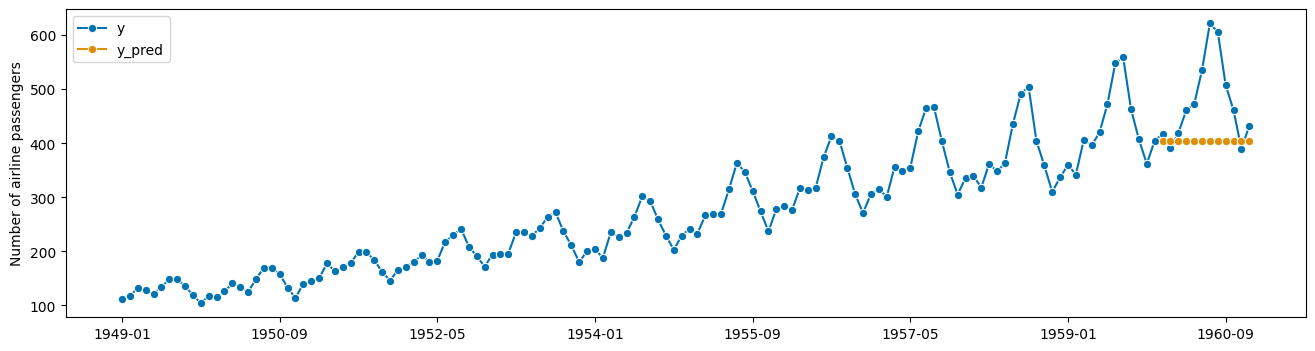

In [12]:
plot_series(y, y_pred, labels=["y", "y_pred"])

# Find the best forecasting method.

In [15]:

#Suppose your best forecast method is snaive. Inorder to forecast next 3 years you can use the following code.
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
#Method 1
fh = np.arange(1, 37)
# Method 2
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)
y_pred

1961-01    417.0
1961-02    391.0
1961-03    419.0
1961-04    461.0
1961-05    472.0
1961-06    535.0
1961-07    622.0
1961-08    606.0
1961-09    508.0
1961-10    461.0
1961-11    390.0
1961-12    432.0
1962-01    417.0
1962-02    391.0
1962-03    419.0
1962-04    461.0
1962-05    472.0
1962-06    535.0
1962-07    622.0
1962-08    606.0
1962-09    508.0
1962-10    461.0
1962-11    390.0
1962-12    432.0
1963-01    417.0
1963-02    391.0
1963-03    419.0
1963-04    461.0
1963-05    472.0
1963-06    535.0
1963-07    622.0
1963-08    606.0
1963-09    508.0
1963-10    461.0
1963-11    390.0
1963-12    432.0
Freq: M, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot: ylabel='Number of airline passengers'>)

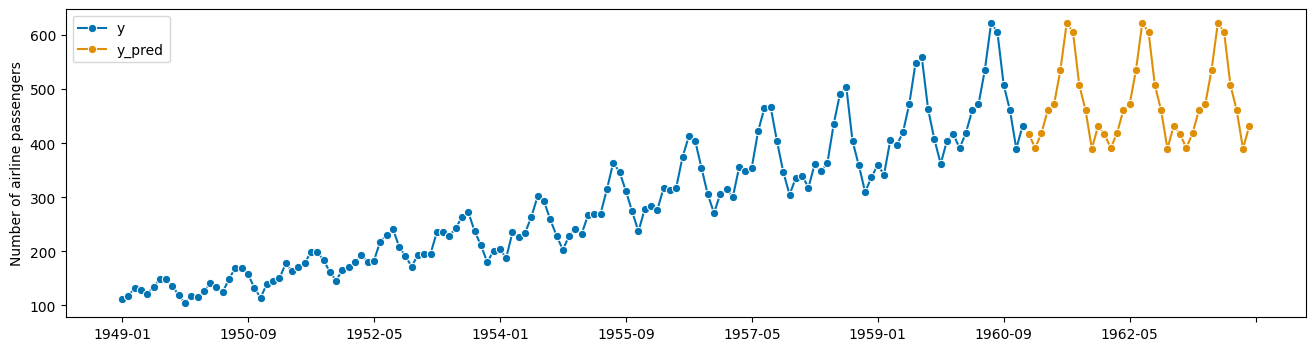

In [16]:
plot_series(y, y_pred, labels=["y", "y_pred"])

Some forecasters need the forecasting horizon provided already in fit. Such forecasters will produce informative error messages when it is not passed in fit. All forecaster will remember the horizon when already passed in fit for prediction. The modified workflow to allow for such forecasters in addition is as follows:

In [17]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y, fh=fh)

# step 5: querying predictions
y_pred = forecaster.predict()

In [18]:
y_pred

1961-01    417.0
1961-02    391.0
1961-03    419.0
1961-04    461.0
1961-05    472.0
1961-06    535.0
1961-07    622.0
1961-08    606.0
1961-09    508.0
1961-10    461.0
1961-11    390.0
1961-12    432.0
1962-01    417.0
1962-02    391.0
1962-03    419.0
1962-04    461.0
1962-05    472.0
1962-06    535.0
1962-07    622.0
1962-08    606.0
1962-09    508.0
1962-10    461.0
1962-11    390.0
1962-12    432.0
1963-01    417.0
1963-02    391.0
1963-03    419.0
1963-04    461.0
1963-05    472.0
1963-06    535.0
1963-07    622.0
1963-08    606.0
1963-09    508.0
1963-10    461.0
1963-11    390.0
1963-12    432.0
Freq: M, dtype: float64

## Forecasters in sktime

In [19]:
from sktime.registry import all_estimators
all_estimators("forecaster", as_dataframe=True)

2022-11-12 03:57:19.314987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sktime/utils/validation/_dependencies.py:117: UserWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the base sktime installation. Please run: `pip install esig` to install the esig package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
Importing plotly failed. Interactive plots will not work.


,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
5,BATS,<class 'sktime.forecasting.bats.BATS'>
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
9,Croston,<class 'sktime.forecasting.croston.Croston'>
